# Mid-Term Exam in Inferential Statistics and Causal Reasoning
## Beam Suwiwatchai 02026376

In [16]:
# ! python -m pip install numpy
# ! python -m pip install matplotlib
# ! python -m pip install scipy

### Question 1 - Simulation: Sum of Two Dice
 You have two fair 6-sided dice. Each die has faces {1,2,3,4,5,6} with equal probability.

---

 >a. Write a Python snippet to simulate rolling these two dice 10,000 times and record the sum of the two faces each time.

In [13]:
import random

counter = {i: 0 for i in range(2,13)}

def roll_two_dice(n=10000):
    global counter

    for i in range(n):
        die1 = random.randint(1,6)
        die2 = random.randint(1,6)
        outcome = die1 + die2
        counter[outcome] +=1
    return counter

# PART A Solution Test:
roll_two_dice(n=10000)
print(counter)

{2: 270, 3: 556, 4: 825, 5: 1094, 6: 1423, 7: 1653, 8: 1387, 9: 1099, 10: 829, 11: 577, 12: 287}


>b. Estimate the probability that the sum is at least 9. Compare to the exact theoretical

This is a discrete uniform distribution: $X_1, X_2 \sim UniformDiscrete(1,6)$

In [14]:
#Probability of greater than 9
sum([counter[i] for i in range(9, 13)]) / sum(counter.values())

0.2792

Theoretical probability that the sum of two fair six-sided dice is at least 9 (greater than or equal to 9) is __10/36 (0.2778)__. This is determined by calculating the probabilities of rolling 9, 10, 11, and 12:

- P(X = 9): (3,6), (4,5), (5,4), (6,3) → 4 Outcomes
- P(X = 10): (4,6), (5,5), (6,4) → 3 Outcomes
- P(X = 11): (5,6), (6,5) → 2 Outcomes
- P(X = 12): (6,6) → 1 Outcome

From 10 favourable outcomes out of 36 possibilities, the theoretical probability is 10/36.

Now, from our simulation, the __P(X≥9) = 0.2792__, is _0.5%_ different from our theoretical value.This discrepancy can be explained by the sampling error where a finite number of trials will always fluctuate around the theoretical probability. This means that according to Law of Large Numbers, as we increase the number of trials, the empircal probability will converge towards the theoretical probability. Thus, while our simulation shows a small variation, the result is very accurate and fits with theoretical expectations.

---

>(c) If you repeat your entire simulation multiple times, about how much does this estimate
fluctuate around the theoretical value?

As rolling two fair six-sided dice follows a **discrete probability distribution**, we estimate the standard deviation of our probability estimate using the formula:

$$\sigma_{\hat{p}} = \sqrt{\frac{p(1 - p)}{n}}$$

where:
- \( p = 0.2778 \) (theoretical probability of sum \(\geq 9\))
- \( n = 10,000 \) (number of trials)

Substituting values:

$$\sigma_{\hat{p}} = \sqrt{\frac{0.2778 \times (1 - 0.2778)}{10,000}}$$

$$\sigma_{\hat{p}} \approx 0.00447$$

By the **95% confidence interval** $\pm 2\sigma_{\hat{p}}$, we expect the estimate to fluctuate around:

$$0.2778 \pm 0.00894$$

$$(0.2689, 0.2867)$$

This means that in repeated simulations, our estimate of $P(X \geq 9)$ will typically fall between **0.2689 and 0.2867** about 95% of the time due to randomness. However, according to the **Law of Large Numbers**, as we increase the number of trials, the empirical probability will converge toward the theoretical probability. Thus, while our simulation shows a small variation, the result is very accurate and aligns well with theoretical expectations.


### Question 2 - Combinatorial Reasoning
A company has 12 employees, and it wants to form a 4-person project team from these 12.

---

>a. How many ways can the 4-person team be chosen if we only care about which employees are on the team (i.e. order does not matter)?

$$_{12}C_{4} = \begin{pmatrix} 12\\4 \end{pmatrix} = \frac{12!}{4!(12-4)!} = 495$$

---

>b. Suppose now that each of the 4 chosen employees must also have a distinct “role rank” among them: leader, co-leader, secretary, or observer. How many ways can we form the team and assign these 4 roles?

There are 4 roles for 4 people where all roles are distinct, therefore this is a permutation of 4, $4!=24$. So the total number of ways to form the team and assign roles is $495 \times 24 = 11,880$. It can also be represented as:

$$_{12}P_{4}=\frac{12!}{(12-4)!}=11,880$$

### Question 3 - Bernoulli Distribution
A coin is slightly biased so that it lands heads with probability p = 0.55. Let X be the random variable for heads (X = 1 if heads, X = 0 if tails)

---

>a. Write down the pmf of X.

$$P(X=x) = \begin{cases} 0.55, & \text{if } x=1\\ 0.45, & \text{if } x=0 \end{cases}$$

---

>b. Compute $E[X]$ and $Var(X)$, explicitly or using Python

$$E[X] = p = 0.55$$

$$Var(X)=p(1-p)=0.55 \times (1-0.55) = 0.2475$$


In [5]:
from scipy.stats import bernoulli
print(bernoulli.pmf(1,0.55))

0.55


### Question 4 - Binomial Distribution
A factory produces items, each of which is “good” with probability 0.9, independently of others. Let Y be the number of good items out of 30 produced in a day.

---
>a. State the distribution of Y

This is a binomial distribution because there is only 2 possible outcome for each trial (good & bad) for a fixed number of trials (n=30) with constant probability of success.

$$Y \sim Binomial(n=30,p=0.9)$$

---

>b. Write $P(Y=k)$

$$P(Y=k) = \begin{pmatrix} n\\ k \end{pmatrix}p^k(1-p)^{n-k}$$

where $n=30$ and $p=0.9$:

$$P(Y=k) = \begin{pmatrix} 30\\ k \end{pmatrix}0.9^k(0.1)^{30-k}$$

---

>c. Compute $Pr(Y=k)$ explicity or using a binomial cdf. Show briefly how to do it using scipy.stats.binom.

__Explicit Calculations:__

$$P(Y \geq 28)=P(X=28)+P(X=29)+P(X=30)$$

$$0.2785+0.1140+0.0189 = 0.4114$$

__Binomial Cumulative Distribution Function:__

$$P(Y \geq 28)=1-P(Y\leq 27) = 1-F(27) = 0.4114$$


In [8]:
from scipy.stats import binom
print(1 - binom.cdf(27, 30, 0.9))

0.4113512395595058


>d. Find $E[Y]$ and $Var(Y)$, explicitly or using Python.

For a binomial distribution, we know that $E[Y]=np$ and $Var(Y)=np(1-p)$. So substituting $n=30$ amd $p=0.9$m we get:

$$E[Y] = 30 \times 0.9 = 27$$

$$Var(Y) = 30 \times 0.9 \times 0.1 = 2.7$$

### Question 5 - Discrete Uniform Distribution
Let $Z$ be a random integer chosen uniformly from {1, 2, ... , 20}.

>a. State the pmf $p_z(k)$ for k = 1, ... , 20.

Z is unformly distributed over the set {1,2,...,20}, therefore each outcome have an equal probability:

$$p_Z(k) =
\begin{cases} 
\frac{1}{20}, & \text{if } k \in \{1, 2, \dots, 20\} \\
0, & \text{otherwise}
\end{cases}$$

---

>b. Find $E[Z]$ and $Var(Z)$, explicitly or using Python.

We know that for a discrete uniform distribution of $Z \sim U(1,n)$, the expected outcome and variance is:

$$E[Z] = \frac{n+1}{2}$$

$$Var(Z)=\frac{n^2-1}{12}$$

Where we can substitute $n=20$ to get $E[Z]=10.5$ and $Var(Z)=33.25$

---

>c. Compute $P(Z \leq 5)$

$$P(Z \leq 5) = \frac{5}{20} = 0.25$$

In [10]:
from scipy.stats import randint
n = 20 # Discrete Uniform distribution over 1 to 20 
print(randint(1,n+1).cdf(5))

0.25


### Question 6 - Continuous Uniform Distribution
A random variable W is uniformly distributed on the interval $[2,5]$.

>a. Explain why W is called Uniform(2,5)

This is because 'uniformly distributed' meant that the PDF is constant over the interval 2 to 5. Where W is equally likely to lie anywhere between 2 and 5, so $W \sim Uniform(2,5)$

---

>b. Write the PDF of $W$.

Where continuous uniform distribution is written as $W \sim Uniform(a,b)$, we can substitute $a=2$ and $b=5$ into the PDF:

$$f_W(w) =
\begin{cases} 
\frac{1}{3}, & \text{if } 2 \leq w \leq 5 \\ 
0, & \text{otherwise} 
\end{cases}$$

---

>c. Find $E[W]$ and $Var(W)$, explicitly or using Python.

We can substitute $a=2$ and $b=5$ into the formula for expected value and variance:

$$E[W] = \frac{a+b}{2} = \frac{2+5}{2} = 3.5$$

$$Var(W) = \frac{(b-a)^2}{12} = \frac{(5-2)^2}{12} = 0.75$$

---

>d. Compute $Pr(W > 4)$

We can use CDF: 

$$P(W>4) = 1-P(W \leq 4) = 1-F_W(4) = 0.3333$$

In [11]:
from scipy.stats import uniform
print(1 - uniform(loc=2, scale=5-2).cdf(4))

0.33333333333333337


### Question 7 - Normal (Gaussian) Distribution
Suppose exam scores in a certain course follow a normal distribution $N(\mu = 50, \sigma^2 = 16)$. Let S be a student's exam score.

>a. Write the pdf of S.

We know that the PDF of normal distribution $S \sim N(\mu, \sigma^2)$ is:

$$f_S(s) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(s - \mu)^2}{2\sigma^2}\right)$$

We can substitute $\mu=50$ and $\sigma=4$ and simplify the PDF to:

$$f_S(s) = \frac{1}{4\sqrt{2\pi}} \exp\left(-\frac{(s - 50)^2}{32}\right)$$

---

>b. Find $Pr(S \leq 45)$ by standardizing or using _scipy.stats.norm_

The computed probability is: $Pr(S\leq 45) \approx 0.1056$.


In [17]:
from scipy.stats import norm
print(norm.cdf(45, 50, 4)) #Substitute mean and std

0.10564977366685535


>c. Compute $Pr(48 \leq S \leq 55)$

$$Pr(48 \leq S \leq 55) = P(S\leq 55)-P(S \leq 48)$$

We can use the Z-score formula ($Z=\frac{S-\mu}{\sigma}$):

$$Z_{48} = \frac{48 - 50}{4} = -0.5, \quad Z_{55} = \frac{55 - 50}{4} = 1.25$$

$$P(48 \leq S \leq 55) = P(Z \leq 1.25) - P(Z \leq -0.5)$$

$$P(48 \leq S \leq 55) \approx 0.5858$$

In [18]:
print(norm.cdf(55, 50, 4) - norm.cdf(48, 50, 4))

0.5858126876071578


### Question 8 - Simulation: Averages of Bernoulli(0.4)
Consider a Bernoulli random variable with p = 0.4. We draw 100 independent samples ofthis variable and compute their average. We repeat that experiment 2,000 times and store all 2,000 sample means.

>a. Write Python code to simulate this process, collecting 2,000 averages.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import norm #We already imported this earlier

# Declare the given variables
p = 0.4
samples = 100
experiments = 2000

# PART A:
sample_means = [np.mean(np.random.binomial(1, p, samples)) for _ in range(experiments)]

>b. Plot or describe the distribution of these 2,000 means. By the Central Limit Theorem, how does it compare to a normal distribution with mean 0.4 and variance $\frac{0.4 \times 0.6}{100}$? Plot the results and comment.

0.04936340215925527


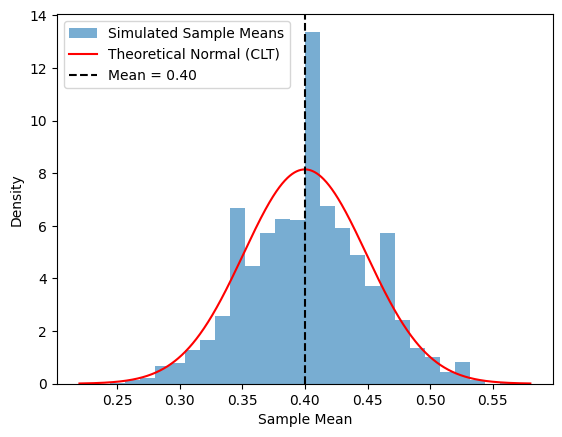

In [8]:
# PART B:
mu = p  # Mean of Bernoulli(p)
sigma_squared = (p * (1 - p)) / samples  # CLT Variance
sigma = np.sqrt(sigma_squared)  # Std

# Generate x values for normal curve
x = np.linspace(min(sample_means), max(sample_means), 1000)
normal_dist = norm.pdf(x, mu, sigma)

#Standard Deviation
print(np.std(sample_means, ddof=1))

# Plot histogram
plt.figure()
plt.hist(sample_means, bins=30, density=True, alpha=0.6, label="Simulated Sample Means")
plt.plot(x, normal_dist, 'r-', label="Theoretical Normal (CLT)")
plt.axvline(mu, color='black', linestyle='dashed', label=f"Mean = {mu:.2f}")

plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.legend()
plt.show()

So out histogram roughly follow the normal distribution's bell curve with the centre around 0.4, which is the expected mean of the Bernoulli(0.4) distribution. The standard deviation is 0.0493.

The empirical results closely match with the theoretical normal distribution predicted by the Central Limit Theorem, where larger sample size would result in a better approximation to normality (Law of Large Numbers). So, eventhough the original Bernoulli distribution is discrete, with enough samples, its average creates a (nearly) continuous normal-like distribution.